### Simple Linear Regression

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
%matplotlib inline


In [30]:
df=pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

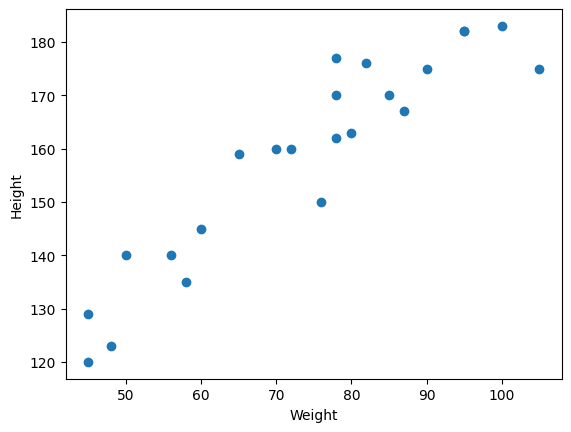

In [31]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [32]:
# Divide our dataset into independent and dependent features 
X=df[['Weight']]  #independent feature
Y=df['Height']  #dependent feature

In [33]:
# Train, test, split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=42)

In [34]:
# Standardization of independent data
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [35]:
# Train model
model=LinearRegression()
model.fit(X_train_scaled,Y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [36]:
# Finding the slope and intercept of the weight(independent feature)
print('The slope or coefficient of weight is ',model.coef_)
print('The intercept is ',model.intercept_)

The slope or coefficient of weight is  [17.03440872]
The intercept is  157.5


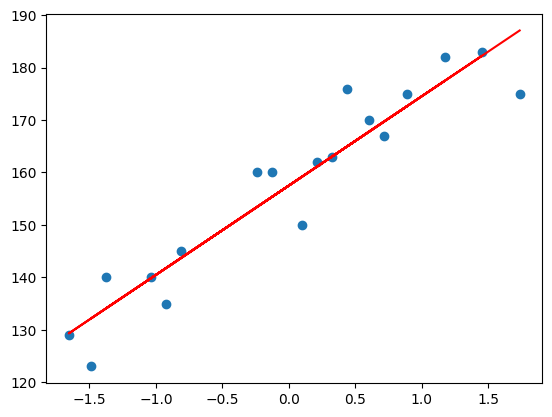

In [37]:
# Plotting best fit line for training data
plt.scatter(X_train_scaled,Y_train)
plt.plot(X_train_scaled,model.predict(X_train_scaled),'r')

In [38]:
Y_pred=model.predict(X_test_scaled)

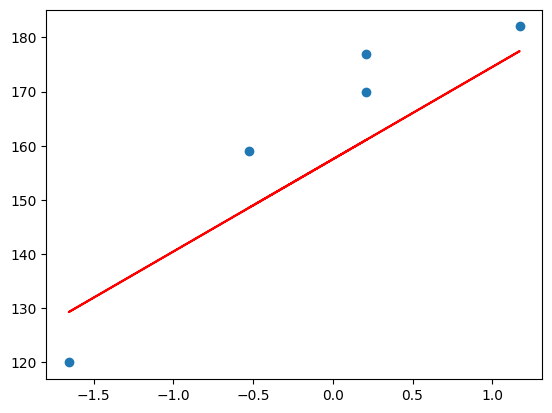

In [39]:
# Plotting best fit line for testing data
plt.scatter(X_test_scaled,Y_test)
plt.plot(X_test_scaled,model.predict(X_test_scaled),'r')

In [45]:
# Performance metrics
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
score=r2_score(Y_test,Y_pred)
print('Mean squared error :',mse)
print('Mean absolute error :',mae)
print('Root mean squared error :',rmse)
print('Score :',score)

Mean squared error : 109.77592599051664
Mean absolute error : 9.822657814519232
Root mean squared error : 10.477400726827081
Score : 0.776986986042344


In [ ]:
# Height prediction for new data point where weight is 80

In [49]:
scaled_weight=scaler.transform([[80]])
scaled_weight

l:\python\pyenv\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [54]:
print('Height of the person whos weight is 80kg is :',model.predict(scaled_weight))

Height of the person whos weight is 80kg is : [163.01076266]


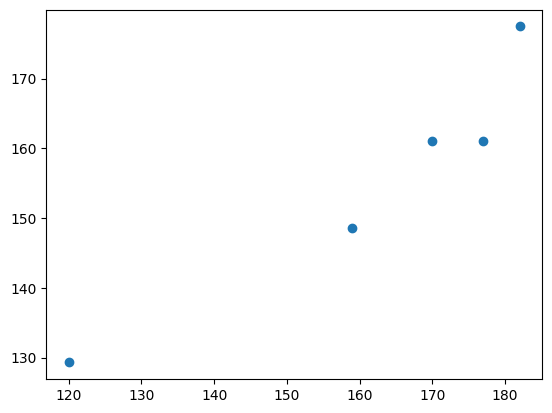

In [55]:
# Assumptions
# Plot scatter plot for prediction
plt.scatter(Y_test,Y_pred)

In [ ]:
# Residuals 
residuals=Y_test-Y_pred
residuals

15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

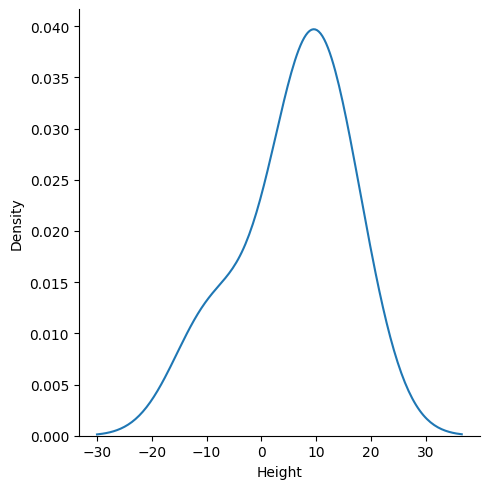

In [60]:
sns.displot(residuals,kind='kde')